In [1]:
from pathlib import Path
import re

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import display, Markdown


In [2]:
PLOTS_DIR = Path("prophet_plots_best")  # change if needed
assert PLOTS_DIR.exists(), f"Folder not found: {PLOTS_DIR.resolve()}"

cluster_re = re.compile(r"^cluster_(\d+)_")

clusters = sorted({
    int(cluster_re.match(p.name).group(1))
    for p in PLOTS_DIR.iterdir()
    if p.is_file() and cluster_re.match(p.name)
})

clusters


[3, 7, 8]

In [3]:
def show_cluster(cluster_id: int, plots_dir: Path = PLOTS_DIR):
    pred_png = plots_dir / f"cluster_{cluster_id}_pred_vs_true.png"
    hist_png = plots_dir / f"cluster_{cluster_id}_error_hist.png"
    summ_txt = plots_dir / f"cluster_{cluster_id}_summary.txt"

    display(Markdown(f"## Cluster {cluster_id}"))

    if summ_txt.exists():
        txt = summ_txt.read_text(encoding="utf-8", errors="replace")
        display(Markdown("### Summary"))
        display(Markdown(f"```text\n{txt}\n```"))
    else:
        display(Markdown("### Summary\n*(missing summary file)*"))

    fig, axes = plt.subplots(1, 2, figsize=(16, 5))

    if pred_png.exists():
        axes[0].imshow(mpimg.imread(pred_png))
        axes[0].set_title("Predictions vs True")
        axes[0].axis("off")
    else:
        axes[0].text(0.5, 0.5, f"Missing:\n{pred_png.name}", ha="center", va="center")
        axes[0].axis("off")

    if hist_png.exists():
        axes[1].imshow(mpimg.imread(hist_png))
        axes[1].set_title("Error Histogram")
        axes[1].axis("off")
    else:
        axes[1].text(0.5, 0.5, f"Missing:\n{hist_png.name}", ha="center", va="center")
        axes[1].axis("off")

    plt.tight_layout()
    plt.show()


## Cluster 3

### Summary
*(missing summary file)*

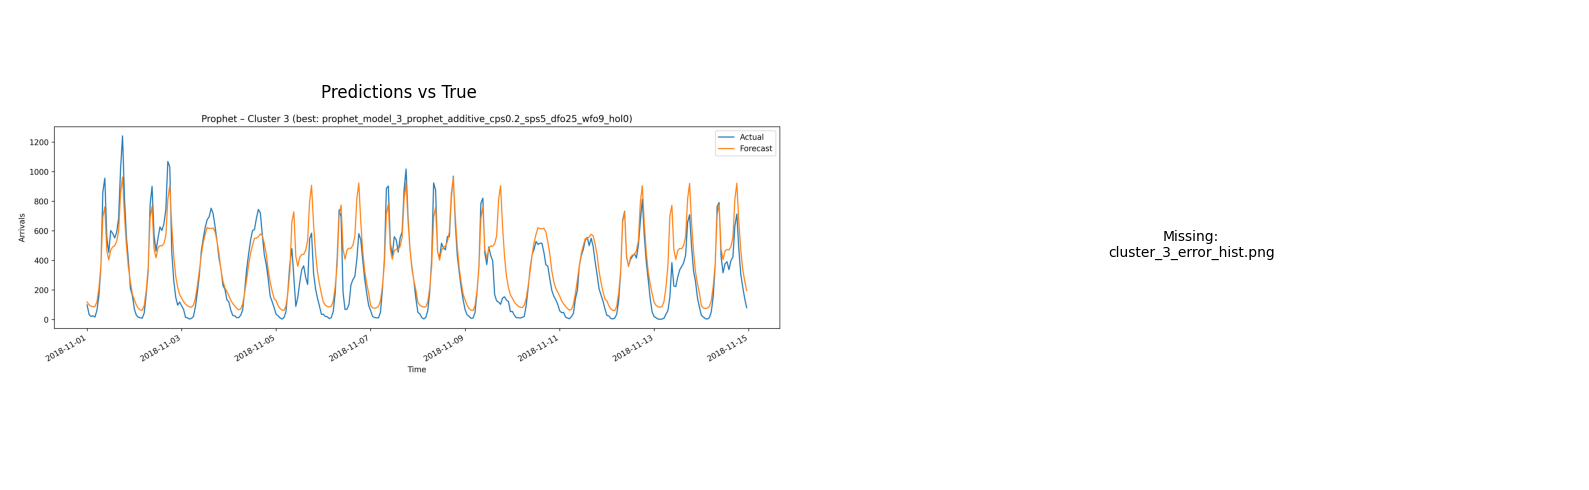

## Cluster 7

### Summary
*(missing summary file)*

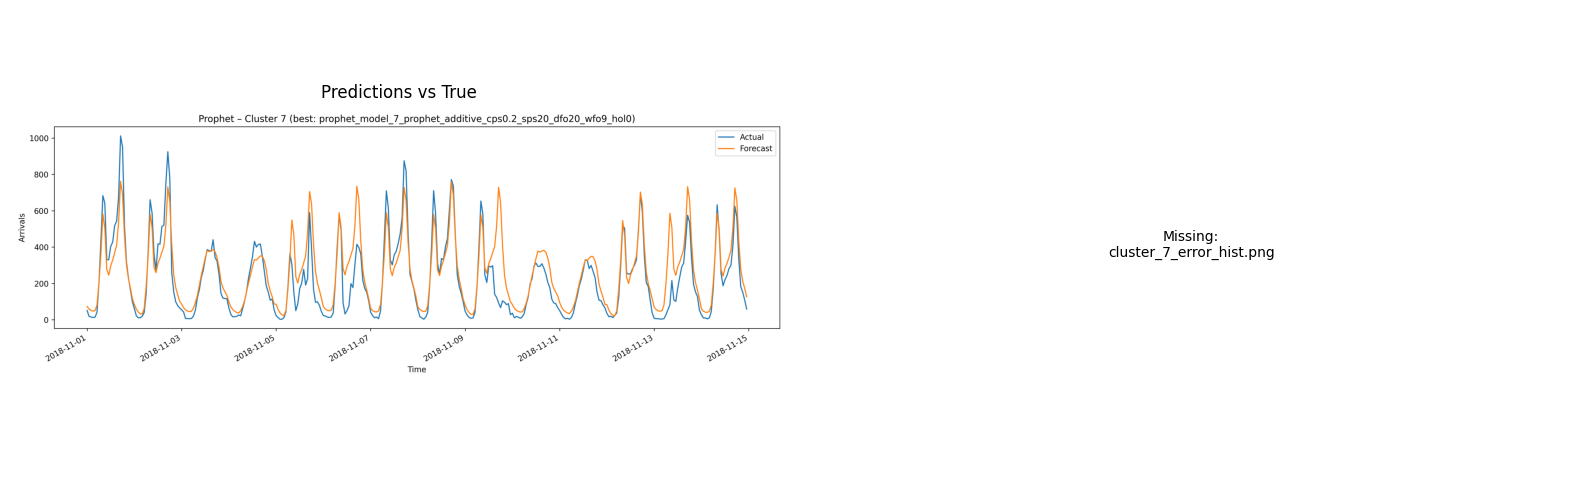

## Cluster 8

### Summary
*(missing summary file)*

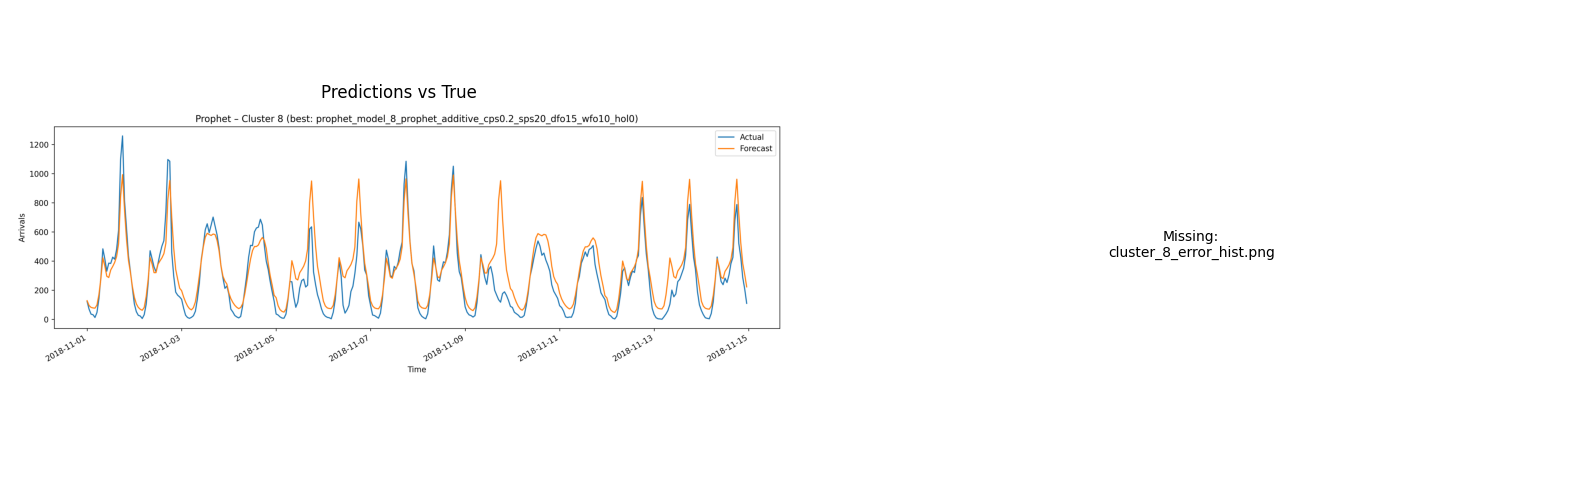

In [4]:
for cid in clusters:
    show_cluster(cid)
